In [73]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from datetime  import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error as mae
import io


In [74]:
df = pd.read_csv('./complete_dataset.csv')
df.head()

date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
3  2015-01-04  104330.715  25.005560      104330.715     25.005560   
4  2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall school_day holiday  
0             26.9            23.6       0.0          N       Y  
1             38.8            26.8       0.0          N       N  
2             38.2            26.5       0.0          N       N  
3             21.4            25.2       4.2          N       N  
4             22.0            30.7       0.0          N       N

In [75]:
df.info

def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

def correlation(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    cor = numerator/denominator
    return cor

def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

def display_pearon_correlation_matrix(df):
    r = df.corr()
    plt.figure(figsize=(20,7))
    heatmap = sns.heatmap(df.corr(), annot=True)
    plt.title("pearson correlation")
    return(r)

In [76]:
df['date']=pd.to_datetime(df['date'])
df.rainfall.fillna(df.rainfall.median(), inplace=True) 

df.solar_exposure.fillna(df.solar_exposure.median(), inplace=True) 

Text(0.5, 1.0, 'date vs demand')

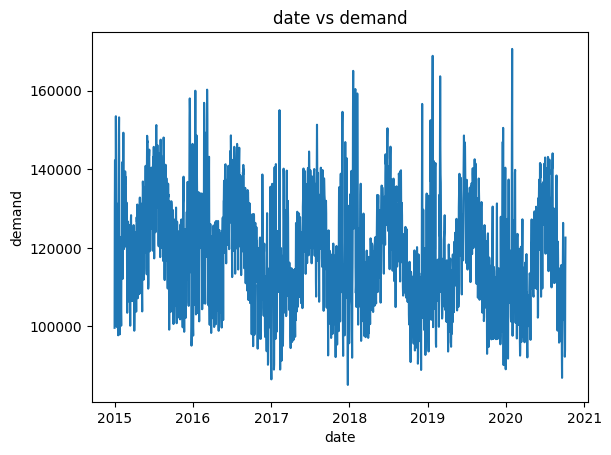

In [77]:
x = df['date']
y = df['demand']

plt.plot(x, y)
plt.xlabel('date')
plt.ylabel('demand')
plt.title('date vs demand')

Text(0.5, 1.0, 'date vs demand for 1 yr')

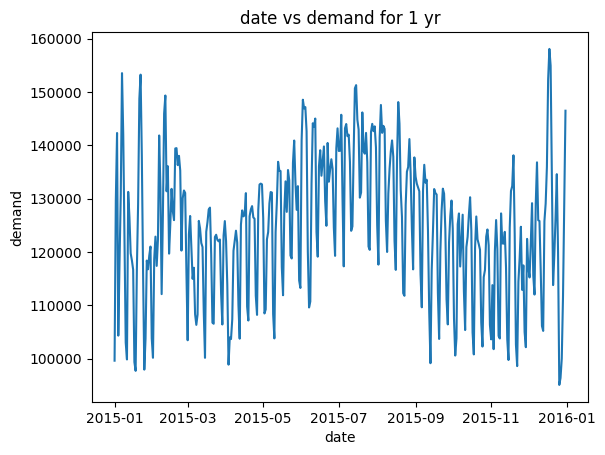

In [78]:
x = df['date']
y = df['demand']

n = 365

x = x[:n]
y = y[:n]


plt.plot(x, y)
plt.xlabel('date')
plt.ylabel('demand')
plt.title('date vs demand for 1 yr')

Text(0.5, 1.0, 'temp vs demand in a yr')

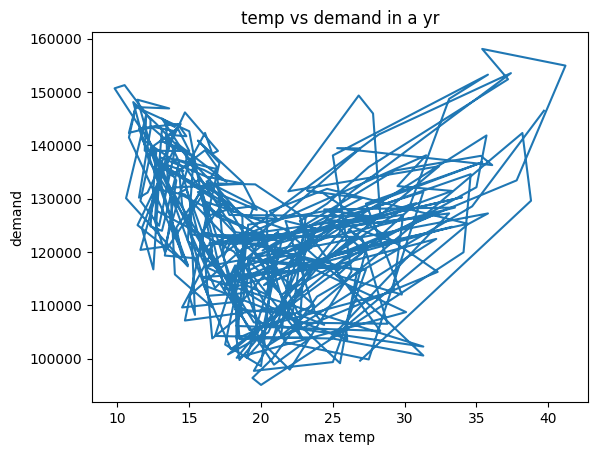

In [79]:
x = df['max_temperature']
y = df['demand']

n = 365

x = x[:n]
y = y[:n]


plt.plot(x, y)
plt.xlabel('max temp')
plt.ylabel('demand')
plt.title('temp vs demand in a yr')

Text(0.5, 1.0, 'RRP vs demand_pos_RRP in a year')

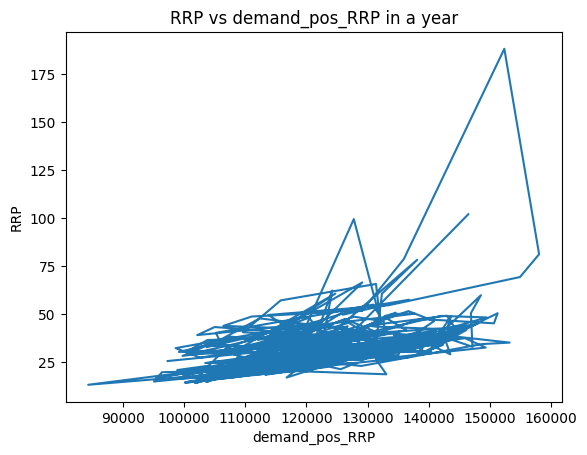

In [80]:
x = df['demand_pos_RRP']
y = df['RRP']

n = 365

x = x[:n]
y = y[:n]


plt.plot(x, y)
plt.xlabel('demand_pos_RRP')
plt.ylabel('RRP')
plt.title('RRP vs demand_pos_RRP in a year')

23.6
25.63369643387471


Text(0.5, 1.0, 'RRP_negative vs solar in a year')

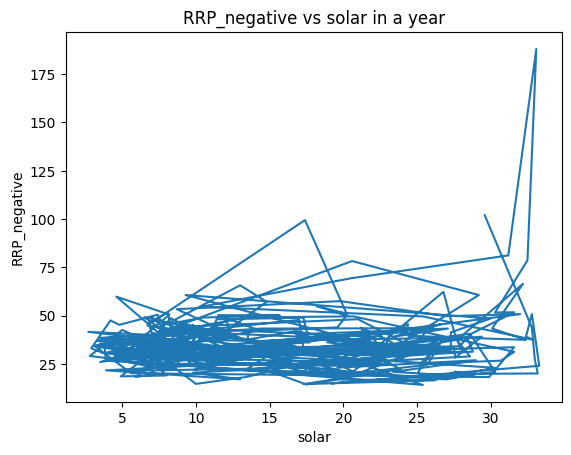

In [81]:

print(df['solar_exposure'][0])
print(df['RRP'][0])


x = df['solar_exposure']
y = df['RRP_positive']

n = 365
x = x[:n]
y = y[:n]

plt.plot(x, y)
plt.xlabel('solar')
plt.ylabel('RRP_negative')
plt.title('RRP_negative vs solar in a year')

In [82]:
df.isna().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

<AxesSubplot: ylabel='RRP'>

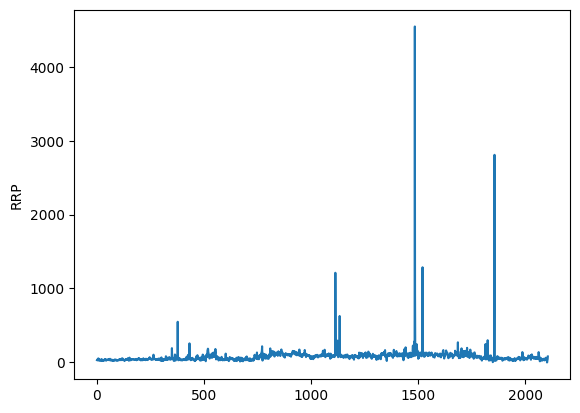

In [83]:
sns.lineplot(df['RRP'])

In [84]:
std_dev = df['RRP'].rolling(4).std()
mean = df['RRP'].rolling(4).mean()

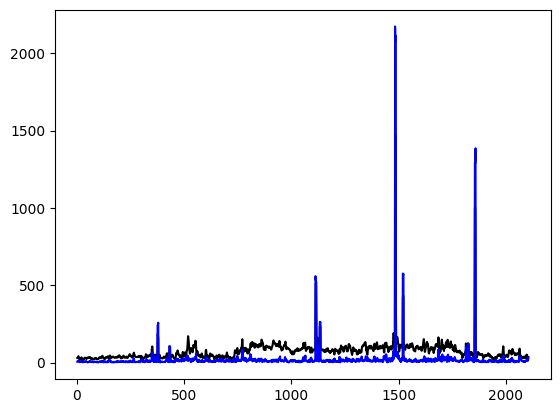

In [85]:
plt.plot(mean, color="black", label="mean of RRP" )
plt.plot( std_dev, color="blue", label="standard deviation of RRP" )

<AxesSubplot: ylabel='RRP'>

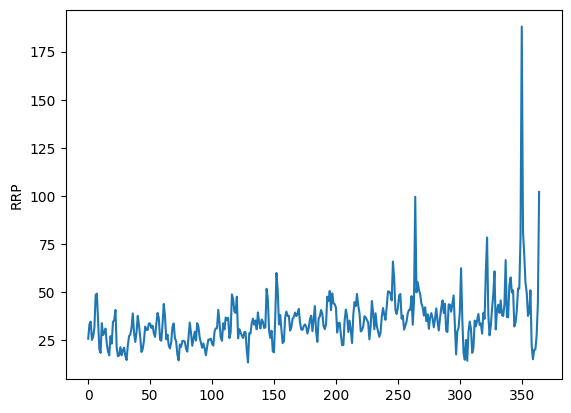

In [86]:
newArray = df[:365]
sns.lineplot(newArray['RRP'])

<AxesSubplot: ylabel='demand'>

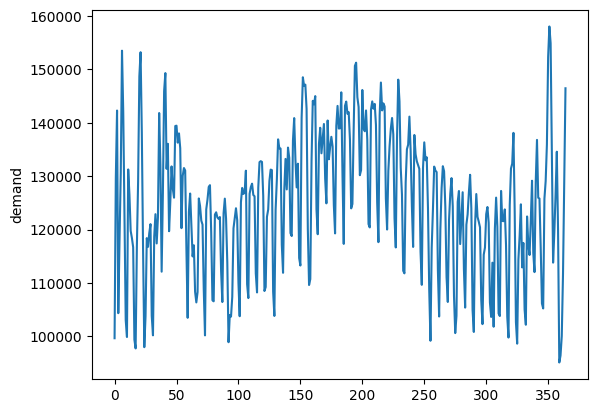

In [87]:
newArray = df[:365]
sns.lineplot(newArray['demand'])

In [88]:
demand_and_RRP = dict(demand=newArray['demand']/1000 , RRP=newArray['RRP']);

<AxesSubplot: >

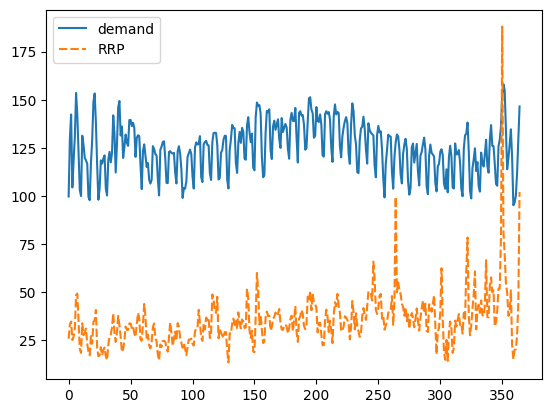

In [89]:
sns.lineplot(demand_and_RRP )

<AxesSubplot: >

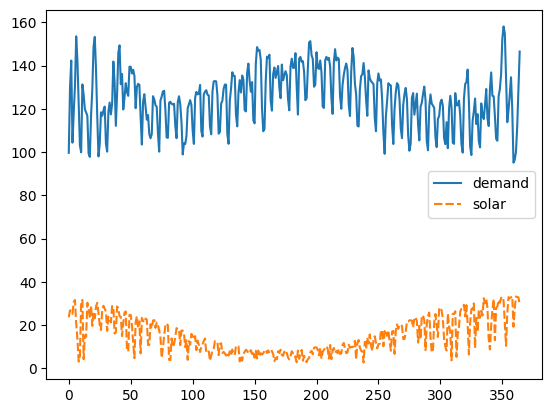

In [90]:
deamnd_and_solarExposure = dict(demand=newArray['demand']/1000 , solar = newArray['solar_exposure'] )
sns.lineplot(deamnd_and_solarExposure)

<AxesSubplot: >

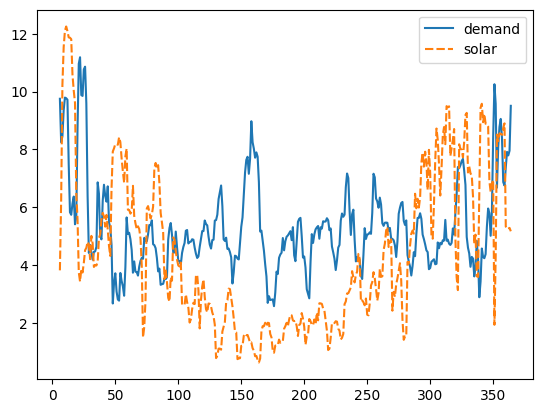

In [91]:
deamnd_and_solarExposure_std = dict(demand=(newArray['demand']/2000).rolling(7).std(), solar = newArray['solar_exposure'].rolling(7).std())
sns.lineplot(deamnd_and_solarExposure_std)
# sum_of_demand_std_and_solarExposure_std = (deamnd_and_solarExposure_std['demand'] + deamnd_and_solarExposure_std['solar'])/2
# sns.lineplot(sum_of_demand_std_and_solarExposure_std)

<AxesSubplot: >

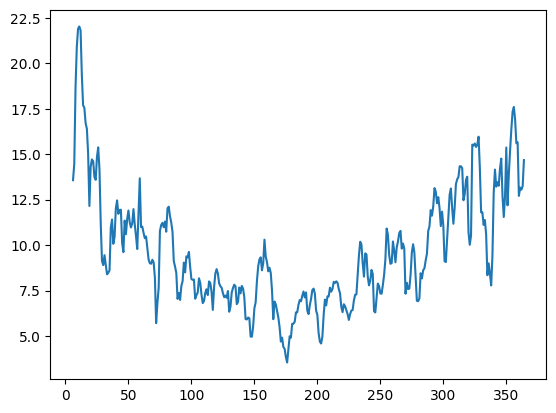

In [92]:
sum_of_demand_std_and_solarExposure_std = deamnd_and_solarExposure_std['demand'] + deamnd_and_solarExposure_std['solar']
sns.lineplot(sum_of_demand_std_and_solarExposure_std)

<AxesSubplot: >

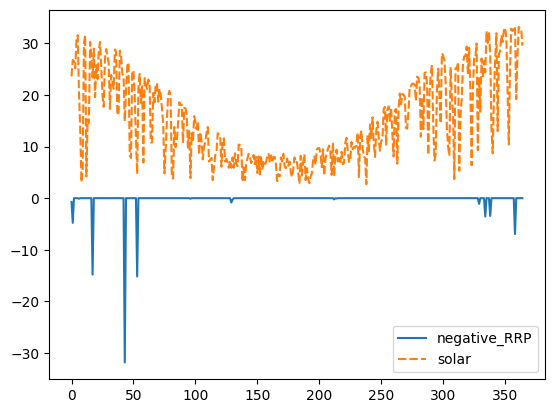

In [93]:

negative_RRP_and_solar_exposure = dict(negative_RRP=newArray['RRP_negative']/10 , solar=newArray['solar_exposure'])
sns.lineplot(negative_RRP_and_solar_exposure)

<AxesSubplot: >

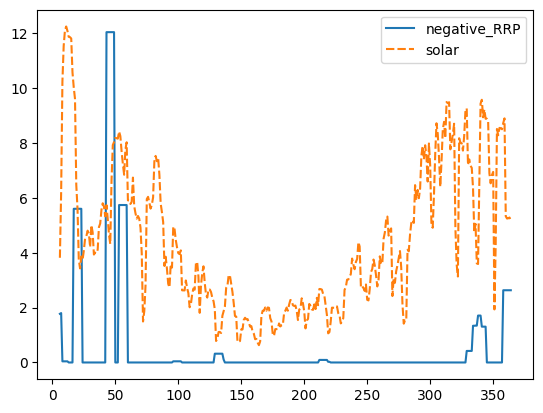

In [94]:
negative_RRP_and_solar_exposure_std = dict(negative_RRP=(newArray['RRP_negative']/10).rolling(7).std() , solar=newArray['solar_exposure'].rolling(7).std())
sns.lineplot(negative_RRP_and_solar_exposure_std)

<AxesSubplot: >

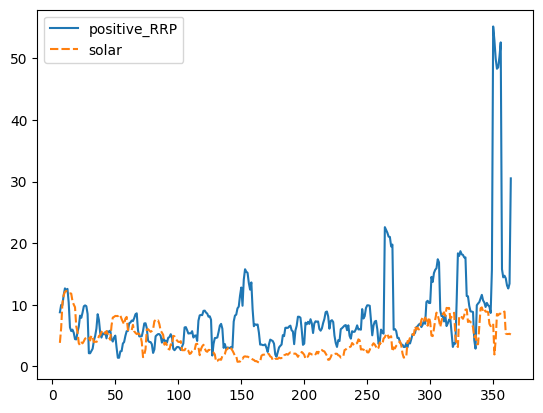

In [95]:
positive_RRP_and_solar_exposure = dict(positive_RRP=newArray['RRP_positive'].rolling(7).std() , solar=newArray['solar_exposure'].rolling(7).std())
sns.lineplot(positive_RRP_and_solar_exposure)

<AxesSubplot: >

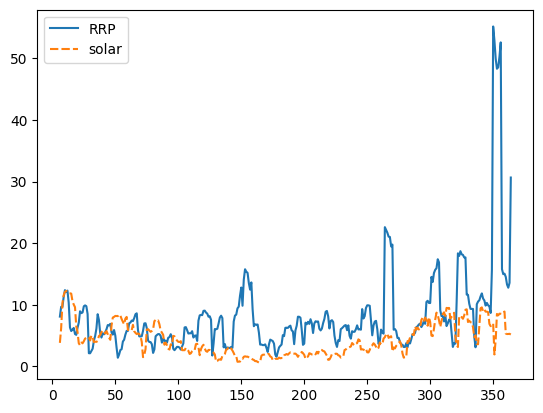

In [96]:
RRP_and_solar_exposure = dict(RRP=newArray['RRP'].rolling(7).std() , solar=newArray['solar_exposure'].rolling(7).std())
sns.lineplot(RRP_and_solar_exposure)

In [97]:
cov  = covariance(newArray['RRP'], newArray['demand'])
print(cov)

corr_rrp_and_demand = correlation(newArray['RRP'], newArray['demand'])
print(corr_rrp_and_demand)

88983.40497573695
0.47815443231539634


In [98]:
cov_demand_and_maxTemp = covariance(newArray['demand'], newArray['max_temperature'])
print(cov_demand_and_maxTemp)

corr_demand_and_maxTemp = correlation(newArray['demand'], newArray['max_temperature'])
print(corr_demand_and_maxTemp)

-8575.373932244469
-0.09838993978426255


In [99]:
cov_solar_exposure_and_RRP_neg = covariance(newArray['solar_exposure'], newArray['demand'])
print(cov_solar_exposure_and_RRP_neg)

corr_solar_and_RRP_negative = correlation(newArray['solar_exposure'], newArray['RRP_negative'])
print(corr_solar_and_RRP_negative)

-32511.351780076784
-0.03236201740667129


In [100]:
cov_solar_and_maxTemp = covariance(newArray['solar_exposure'], newArray['max_temperature'])
print(cov_solar_and_maxTemp)

corr_solar_and_maxTemp = correlation(newArray['solar_exposure'], newArray['max_temperature'])
print(corr_solar_and_maxTemp)

34.04201926840285
0.5993476820228634


In [101]:
cov_solar_and_RRP = covariance(newArray['solar_exposure'], newArray['RRP'])
corr_solar_and_rrp = correlation(newArray['solar_exposure'], newArray['RRP'])
print('correlation :' , corr_solar_and_rrp)
print(cov_solar_and_RRP)

correlation : 0.12680042711358117
15.377851471852596


In [102]:
corr_solar_and_rrp = correlation(newArray['solar_exposure'], newArray['RRP'])
print(corr_solar_and_rrp)

0.12680042711358117


C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\587166112.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r = df.corr(method="spearman")
C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\587166112.py:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1,


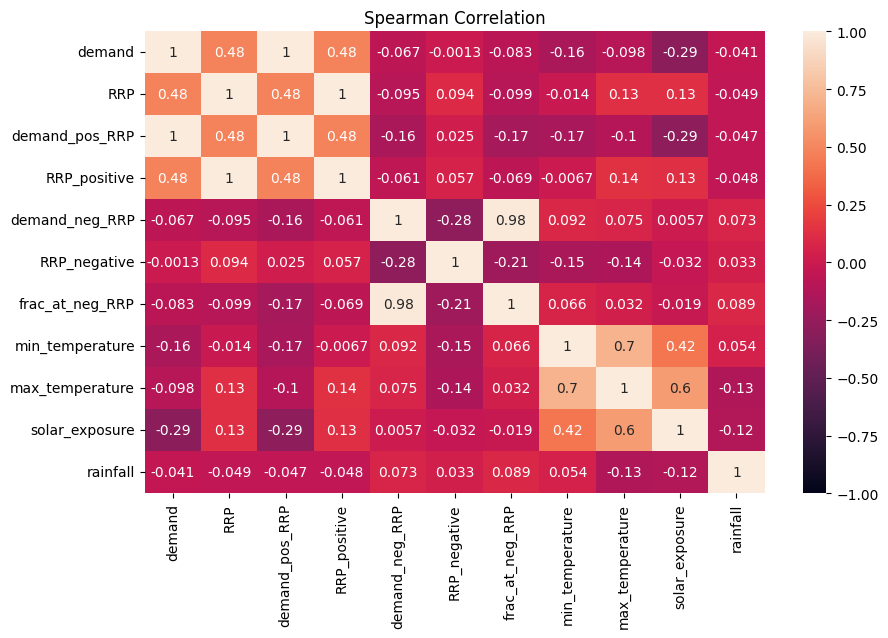

In [103]:
simple = display_correlation(newArray)

In [104]:
result = adfuller(newArray['demand'], autolag='AIC')

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -2.095583
p-value: 0.246294
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Failed to Reject Ho - Time Series is Non-Stationary


In [105]:
newArray.drop(['min_temperature'], axis=1)

date      demand         RRP  demand_pos_RRP  RRP_positive  \
0   2015-01-01   99635.030   25.633696       97319.240     26.415953   
1   2015-01-02  129606.010   33.138988      121082.015     38.837661   
2   2015-01-03  142300.540   34.564855      142300.540     34.564855   
3   2015-01-04  104330.715   25.005560      104330.715     25.005560   
4   2015-01-05  118132.200   26.724176      118132.200     26.724176   
..         ...         ...         ...             ...           ...   
360 2015-12-27   96394.940   19.823184       96394.940     19.823184   
361 2015-12-28  100048.440   20.097540      100048.440     20.097540   
362 2015-12-29  111647.540   27.331702      111647.540     27.331702   
363 2015-12-30  128552.135   43.826875      128552.135     43.826875   
364 2015-12-31  146473.835  101.991559      146473.835    101.991559   

     demand_neg_RRP  RRP_negative  frac_at_neg_RRP  max_temperature  \
0          2315.790     -7.240000         0.020833             26.9   
1          8523.995    -47.809777         0.062500             38.8   
2             0.000      0.000000         0.000000             38.2   
3             0.000      0.000000         0.000000             21.4   
4             0.000      0.000000         0.000000             22.0   
..              ...           ...              ...              ...   
360           0.000      0.000000         0.000000             19.4   
361           0.000      0.000000         0.000000             20.8   
362           0.000      0.000000         0.000000             23.9   
363           0.000      0.000000         0.000000             34.7   
364           0.000      0.000000         0.000000             39.7   

     solar_exposure  rainfall school_day holiday  
0              23.6       0.0          N       Y  
1              26.8       0.0          N       N  
2              26.5       0.0          N       N  
3              25.2       4.2          N       N  
4              30.7       0.0          N       N  
..              ...       ...        ...     ...  
360            27.6       5.2          N       N  
361            33.2       0.0          N       Y  
362            33.0       0.0          N       N  
363            32.8       0.0          N       N  
364            29.6       0.0          N       N  

[365 rows x 13 columns]

In [106]:
newArray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             365 non-null    datetime64[ns]
 1   demand           365 non-null    float64       
 2   RRP              365 non-null    float64       
 3   demand_pos_RRP   365 non-null    float64       
 4   RRP_positive     365 non-null    float64       
 5   demand_neg_RRP   365 non-null    float64       
 6   RRP_negative     365 non-null    float64       
 7   frac_at_neg_RRP  365 non-null    float64       
 8   min_temperature  365 non-null    float64       
 9   max_temperature  365 non-null    float64       
 10  solar_exposure   365 non-null    float64       
 11  rainfall         365 non-null    float64       
 12  school_day       365 non-null    object        
 13  holiday          365 non-null    object        
dtypes: datetime64[ns](1), float64(11), object(

In [107]:
newArray.isna().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

In [108]:
newArray.duplicated().sum()

0

In [109]:
df['Year'] = df['date'].dt.year 
#To extract the month 
df['Month'] = df['date'].dt.month 
#To extract the day
df['Day'] = df['date'].dt.day

df['Week'] = df['date'].dt.week

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\3302787250.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['date'].dt.week


C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\1866706685.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p1=sns.lineplot(data=df, x='Month', y='RRP', hue='Year', palette=colors, ci=None,
C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\1866706685.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p2=sns.lineplot(data=df_inner, x='Day', y='RRP', hue='Year', palette=color, ci=None)


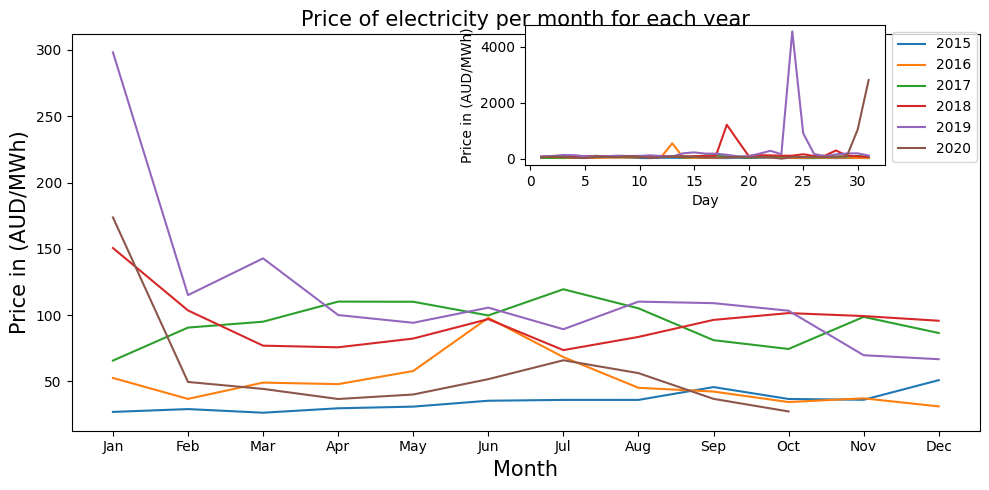

In [110]:
fig, ax1 = plt.subplots(figsize=(10,5))
# ------------bigger plot
Average_monthly_demand = df.groupby(['Month', 'Year'])['RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
p1=sns.lineplot(data=df, x='Month', y='RRP', hue='Year', palette=colors, ci=None, 
                legend=False)
p1.set_xticks(range(1, 13)) 
p1.set_xlabel("Month", fontsize=15)
p1.set_ylabel("Price in (AUD/MWh)", fontsize=15)
p1.set_title('Price of electricity per month for each year', fontsize=15)
p1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

# -------------Inner plot ------
df_inner=df.loc[df['Month']==1]
l, b, h, w = 0.53, 0.66, .28, .36 #< setting for inset
ax2 = fig.add_axes([l, b, w, h])
Average_monthly_demand = df_inner.groupby(['Day', 'Year'])['RRP'].mean().reset_index()
color = sns.color_palette("tab10", n_colors=6)
p2=sns.lineplot(data=df_inner, x='Day', y='RRP', hue='Year', palette=color, ci=None)
p2.set_xlabel("Day", fontsize=10)
p2.set_ylabel("Price in (AUD/MWh)", fontsize=10)

p2.legend(bbox_to_anchor= (1,1))
plt.show()

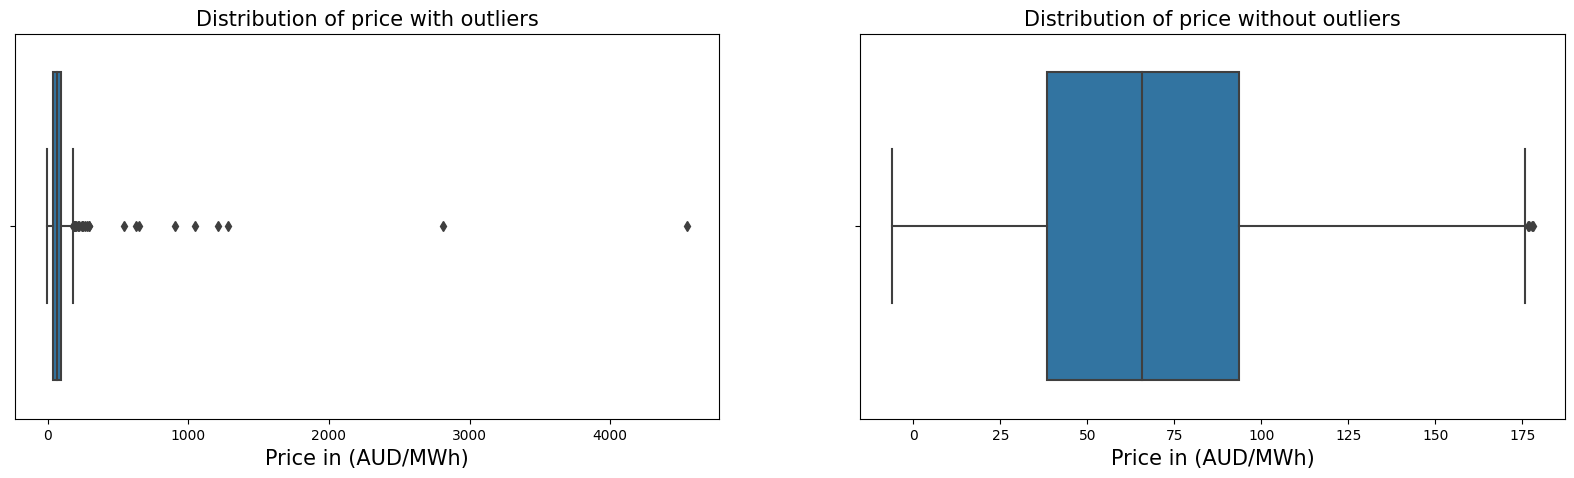

In [111]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.boxplot(x=df["RRP"])
g.set_title('Distribution of price with outliers', fontsize=15)
g.set_xlabel(r"Price in (AUD/MWh)",fontsize=15)
df_1=df.copy()

#Setting the quantile range
Q1 = df_1['RRP'].quantile(0.25)
Q3 = df_1['RRP'].quantile(0.75)
IQR = Q3 - Q1 

#Roming the outliers
df_1 = df_1[(df_1['RRP'] > (Q1 - 1.5 * IQR)) & (df_1['RRP'] < (Q3 + 1.5 * IQR))]
plt.subplot(1,2,2)
g1=sns.boxplot(x=df_1["RRP"])
g1.set_xlabel("Price in (AUD/MWh)",fontsize=15)
g1.set_title('Distribution of price without outliers', fontsize=15);

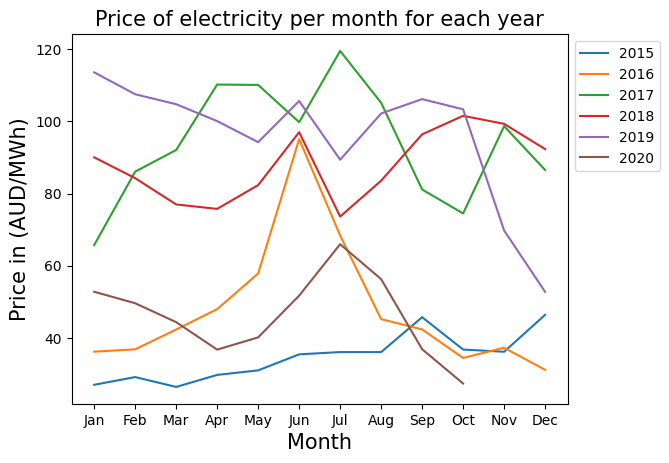

In [112]:

Average_monthly_demand = df_1.groupby(['Month', 'Year'])['RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='RRP', hue='Year', palette=colors, errorbar=None)
g.set_xticks(range(1, 13)) 
g.set_title('Price of electricity per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.,1))
plt.show()

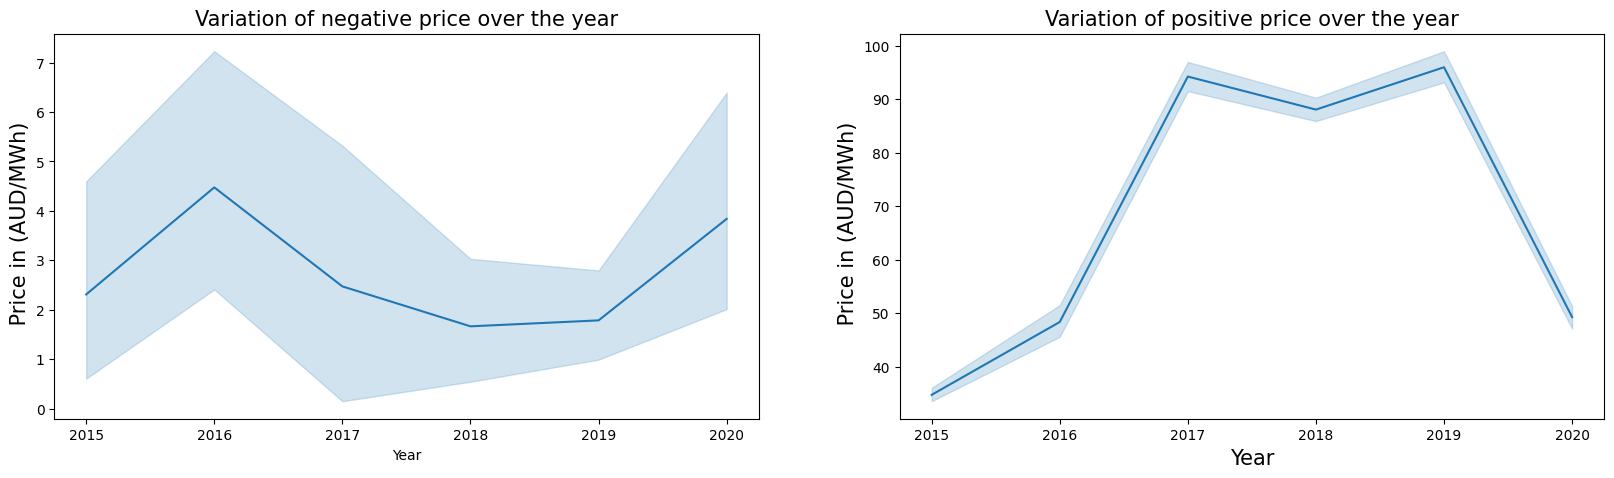

In [113]:
df_1['RRP_negative_1']=df_1['RRP_negative']*-1
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Year', y='RRP_negative_1')
g.set_ylabel(' Price in (AUD/MWh)', fontsize=15)
g.set_title('Variation of negative price over the year', fontsize=15)

plt.subplot(1,2,2)
g=sns.lineplot(data=df_1, x='Year', y='RRP_positive')
g.set_ylabel(' Price in (AUD/MWh)', fontsize=15) 
g.set_title('Variation of positive price over the year', fontsize=15)
g.set_xlabel('Year',fontsize=15)

plt.show()

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\2800043612.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df_1, x='Month', y='RRP_negative_1', hue='Year', palette=colors, ci=None)
C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\2800043612.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df_1, x='Month', y='RRP_positive', hue='Year', palette=colors, ci=None)


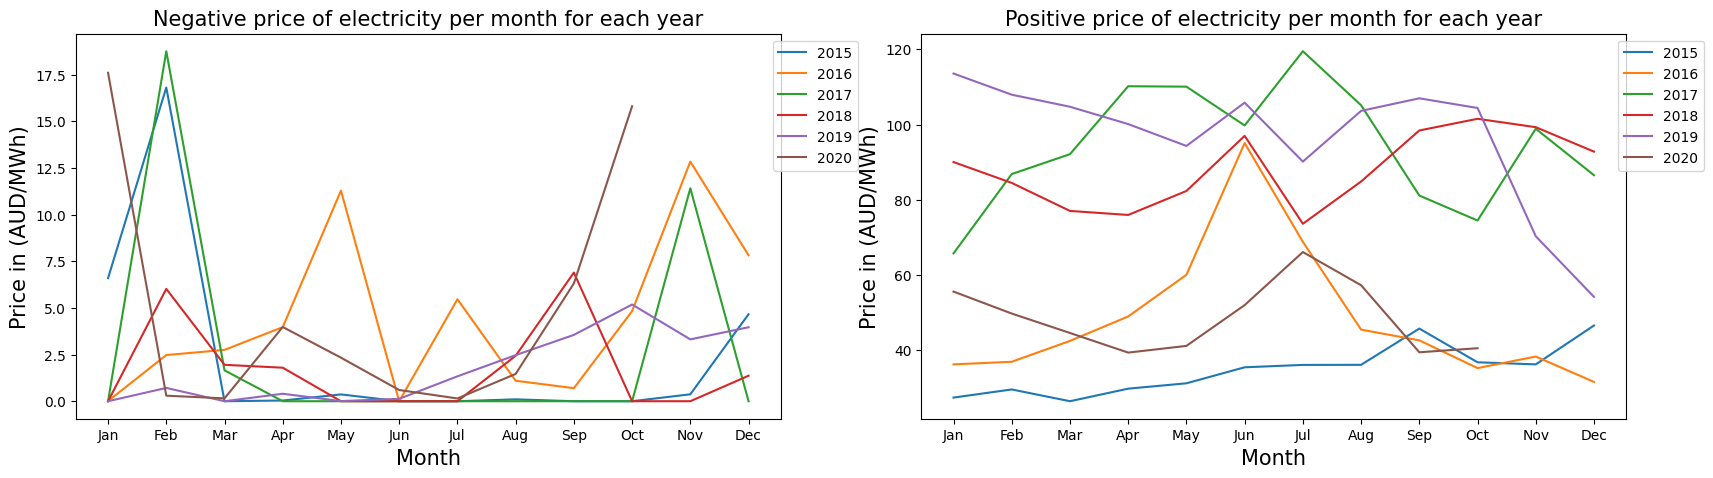

In [114]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
df_1['RRP_negative_1']=df_1['RRP_negative']*-1
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['RRP_negative_1'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='RRP_negative_1', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Negative price of electricity per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.12,1))


plt.subplot(1,2,2)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['RRP_positive'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='RRP_positive', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Positive price of electricity per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\569014673.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df_1, x='Month', y='RRP', hue='Year', palette=colors, ci=None)


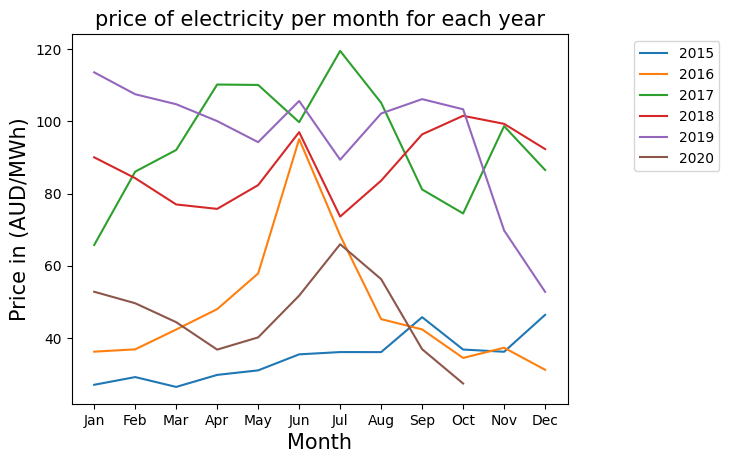

In [115]:
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='RRP', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('price of electricity per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

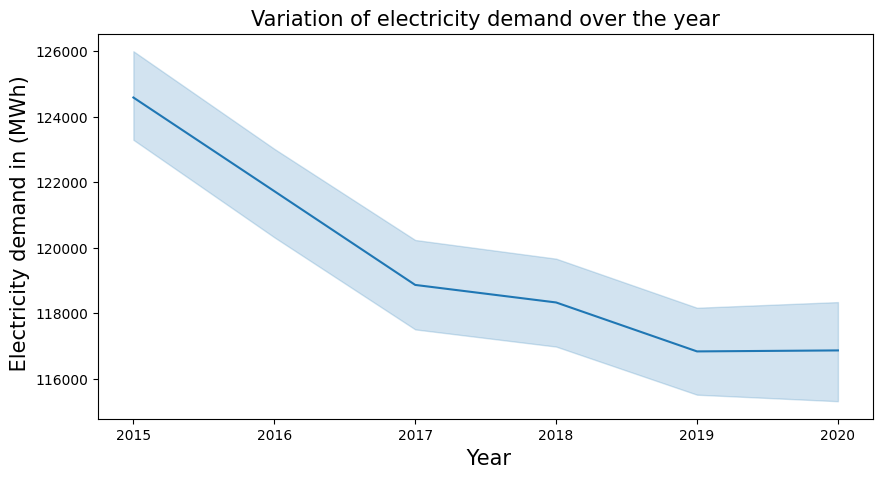

In [116]:
plt.figure(figsize=(10, 5))
g=sns.lineplot(data=df_1, x='Year', y='demand');
g.set_ylabel(' Electricity demand in (MWh)', fontsize=15) 
g.set_xlabel(' Year', fontsize=15)
g.set_title('Variation of electricity demand over the year', fontsize=15);

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\2762058889.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df, x='Month', y='demand', hue='Year', palette=colors, ci=None)


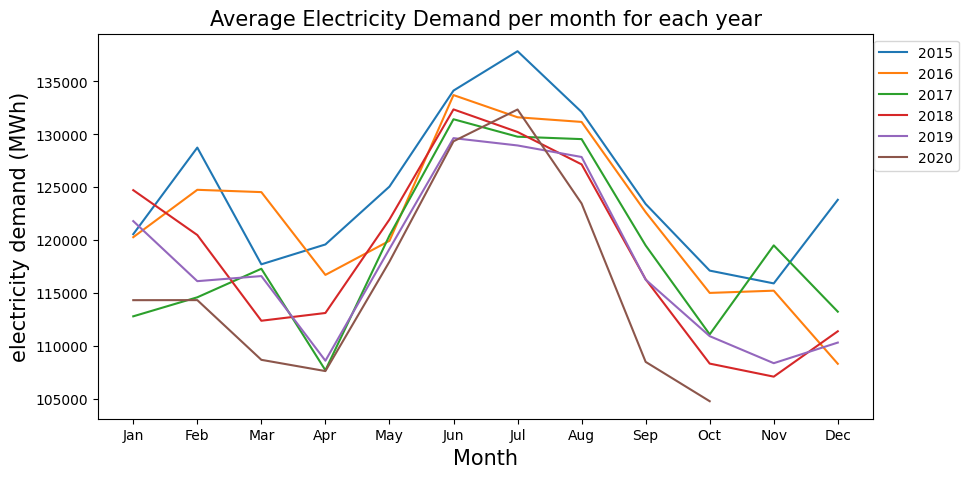

In [117]:
plt.figure(figsize=(10, 5))
Average_monthly_demand = df.groupby(['Month', 'Year'])['demand'].mean().reset_index()
colors=color = sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df, x='Month', y='demand', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Average Electricity Demand per month for each year', fontsize=15)
g.set_xlabel('Month', fontsize=15)
g.set_ylabel('electricity demand (MWh)', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

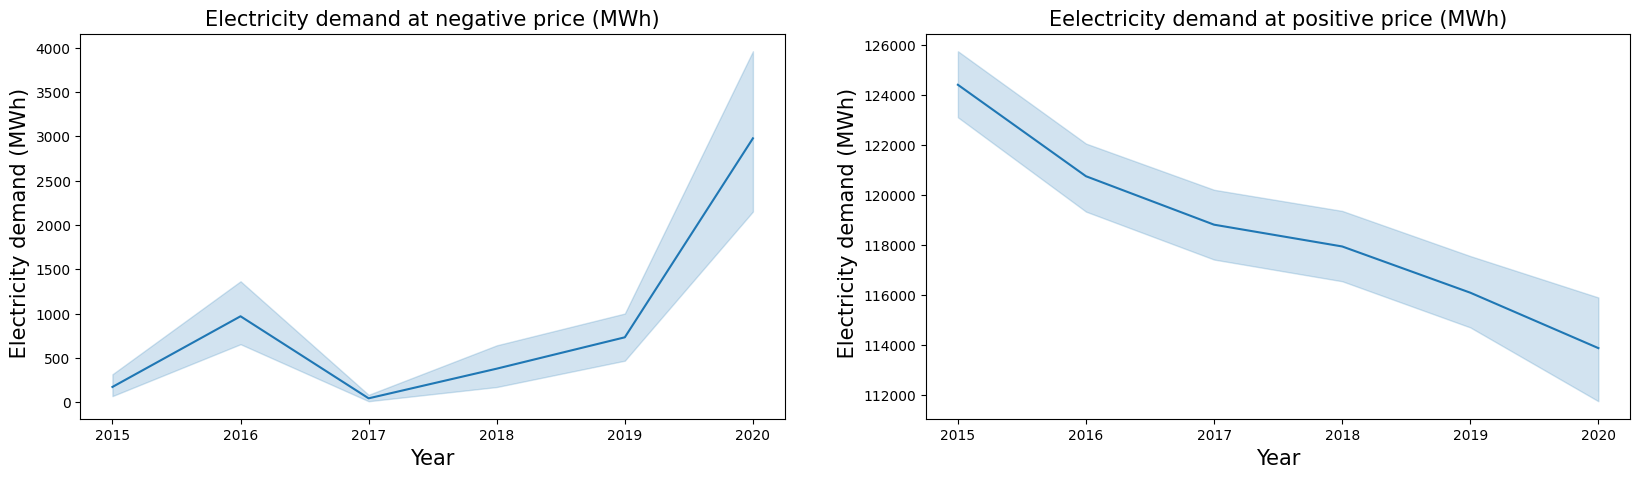

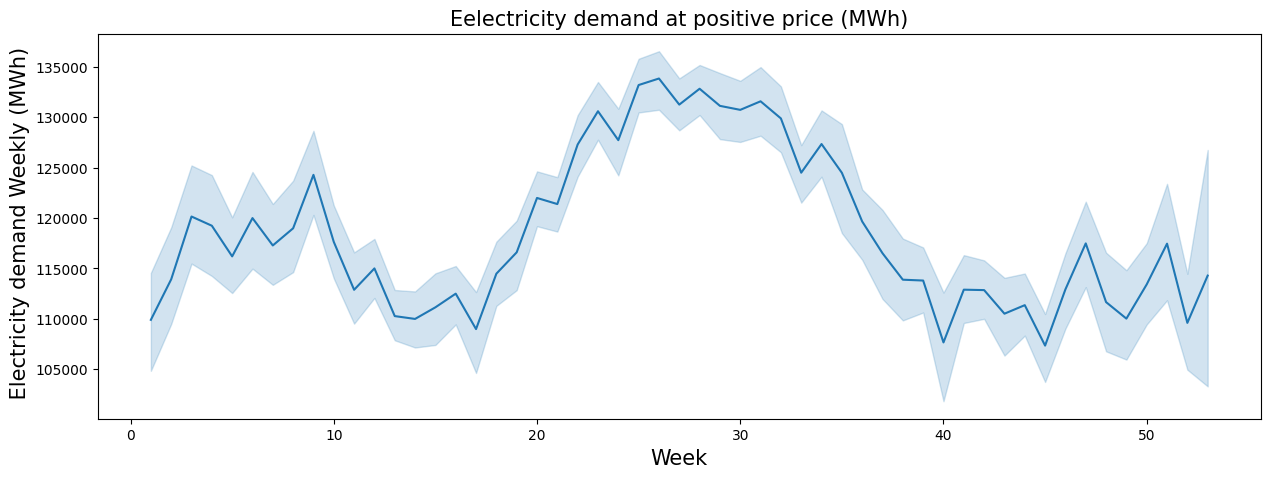

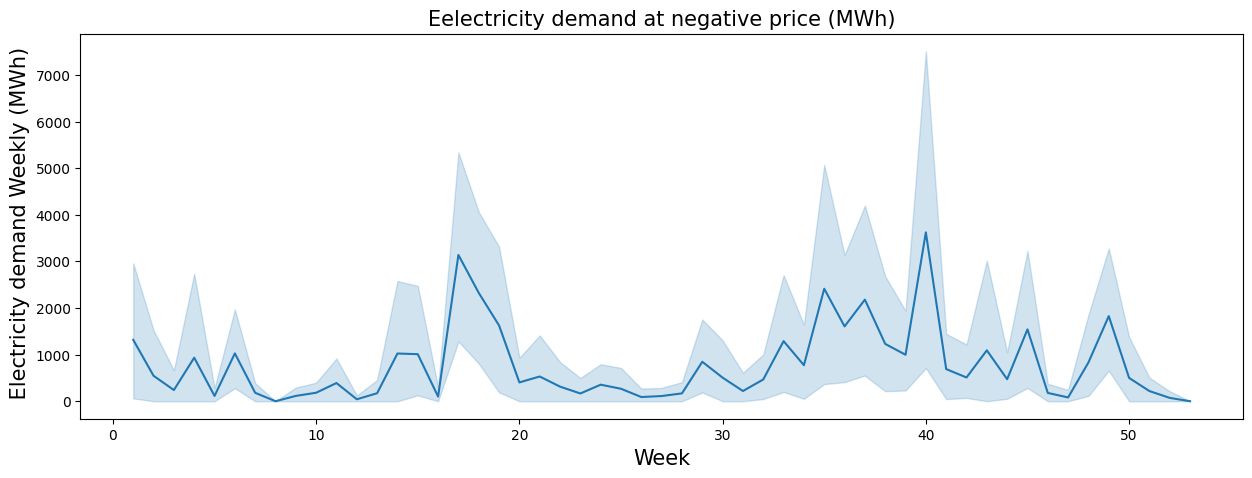

In [168]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Year', y='demand_neg_RRP')
g.set_ylabel(' Electricity demand (MWh)', fontsize=15) 
g.set_title('Electricity demand at negative price (MWh)', fontsize=15)
g.set_xlabel('Year', fontsize=15)


plt.subplot(1,2,2)
g=sns.lineplot(data=df_1, x='Year', y='demand_pos_RRP')
g.set_ylabel(' Electricity demand (MWh)', fontsize=15) 
g.set_title('Eelectricity demand at positive price (MWh)', fontsize=15)
g.set_xlabel('Year', fontsize=15)
plt.show()


plt.figure(figsize=(15, 5))
g=sns.lineplot(data=df_1, x='Week', y='demand_pos_RRP')
g.set_ylabel(' Electricity demand Weekly (MWh)', fontsize=15) 
g.set_title('Eelectricity demand at positive price (MWh)', fontsize=15)
g.set_xlabel('Week', fontsize=15)

plt.figure(figsize=(15, 5))
g=sns.lineplot(data=df_1, x='Week', y='demand_neg_RRP')
g.set_ylabel(' Electricity demand Weekly (MWh)', fontsize=15) 
g.set_title('Eelectricity demand at negative price (MWh)', fontsize=15)
g.set_xlabel('Week', fontsize=15)

plt.show()

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\2329504536.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df_1, x='Month', y='demand_neg_RRP', hue='Year', palette=colors, ci=None)
C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\2329504536.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df_1, x='Month', y='demand_pos_RRP', hue='Year', palette=colors, ci=None)


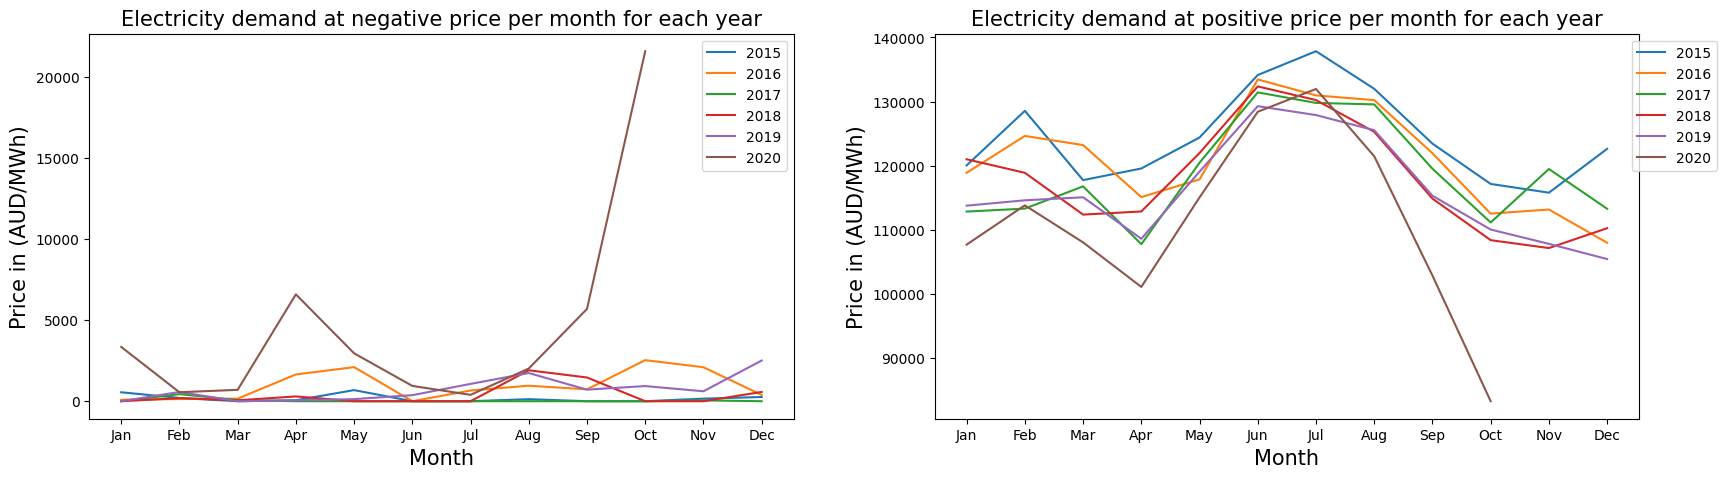

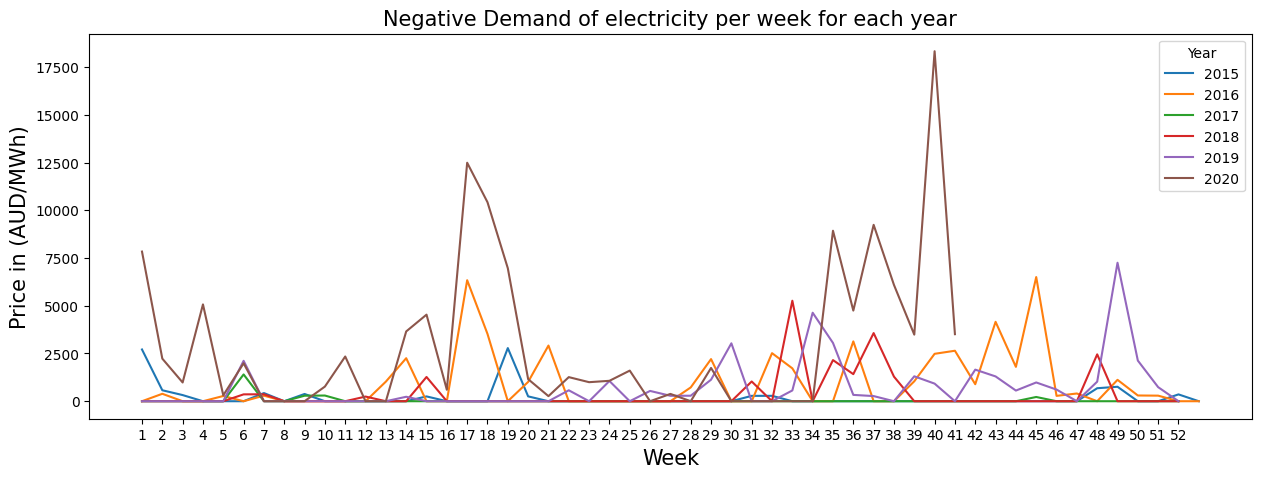

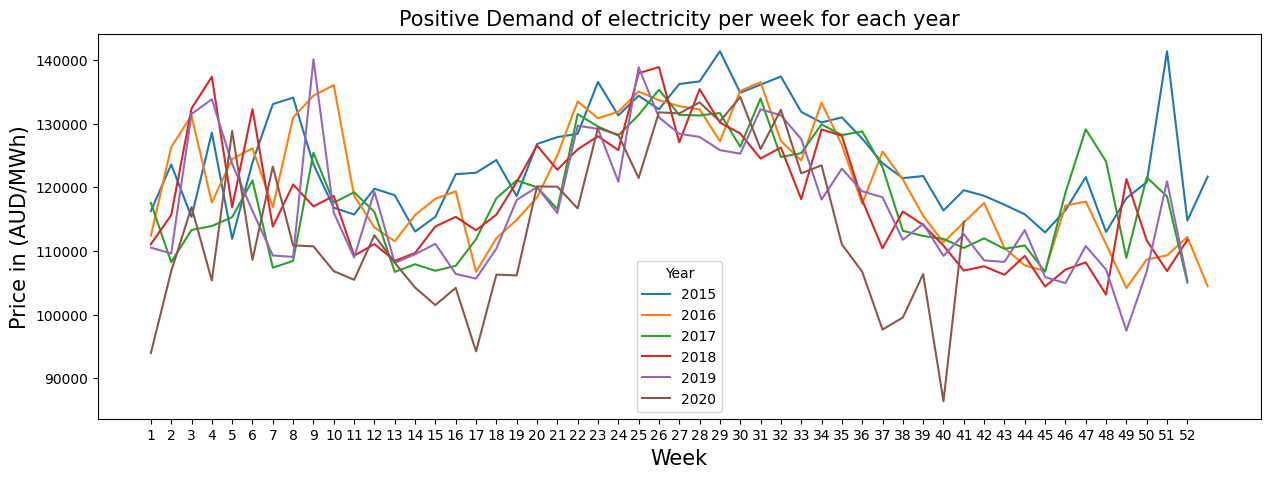

In [165]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['demand_neg_RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='demand_neg_RRP', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Electricity demand at negative price per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.,1))


plt.subplot(1,2,2)
df_1['RRP_negative_1']=df_1['RRP_negative']*-1
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['demand_pos_RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='demand_pos_RRP', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Electricity demand at positive price per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

plt.figure(figsize=(15, 5))
Average_weekly_negative_demand = df.groupby(['Week', 'Year'])['demand_neg_RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
p1=sns.lineplot(data=df, x='Week', y='demand_neg_RRP', hue='Year', palette=colors, errorbar=None)
p1.set_xticks(range(1, 53))
g.legend(bbox_to_anchor= (1.12,1))
p1.set_xlabel("Week", fontsize=15)
p1.set_ylabel("Price in (AUD/MWh)", fontsize=15)
p1.set_title('Negative Demand of electricity per week for each year', fontsize=15)
p1.set_xticklabels(['1','2','3','4','5','6', '7', '8', '9', '10','11','12','13','14','15','16', '17', '18', '19', '20','21','22','23','24','25','26', '27', '28', '29', '30','31','32','33','34','35','36', '37', '38', '39', '40','41','42','43','44','45','46', '47', '48', '49', '50', '51', '52' ])
plt.show()

plt.figure(figsize=(15, 5))
Average_weekly_positive_demand = df.groupby(['Week', 'Year'])['demand_pos_RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
p1=sns.lineplot(data=df, x='Week', y='demand_pos_RRP', hue='Year', palette=colors, errorbar=None)
p1.set_xticks(range(1, 53))
g.legend(bbox_to_anchor= (1.12,1))
p1.set_xlabel("Week", fontsize=15)
p1.set_ylabel("Price in (AUD/MWh)", fontsize=15)
p1.set_title('Positive Demand of electricity per week for each year', fontsize=15)
p1.set_xticklabels(['1','2','3','4','5','6', '7', '8', '9', '10','11','12','13','14','15','16', '17', '18', '19', '20','21','22','23','24','25','26', '27', '28', '29', '30','31','32','33','34','35','36', '37', '38', '39', '40','41','42','43','44','45','46', '47', '48', '49', '50', '51', '52' ])
plt.show()


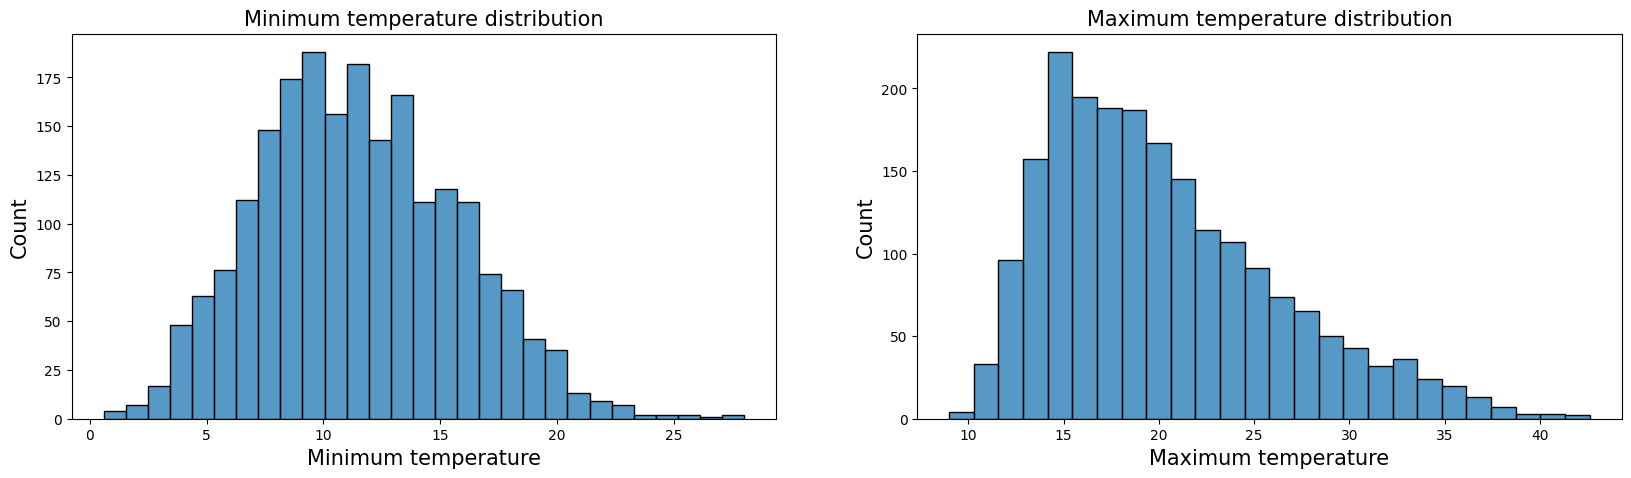

In [159]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
gl1=sns.histplot(x=df_1['min_temperature'])
gl1.set_title('Minimum temperature distribution', fontsize=15)
gl1.set_xlabel('Minimum temperature', fontsize=15)
gl1.set_ylabel('Count', fontsize=15)

plt.subplot(1,2,2)
gl2=sns.histplot(x=df_1['max_temperature']);
gl2.set_title('Maximum temperature distribution', fontsize=15)
gl2.set_xlabel('Maximum temperature', fontsize=15)
gl2.set_ylabel('Count', fontsize=15)
plt.show()

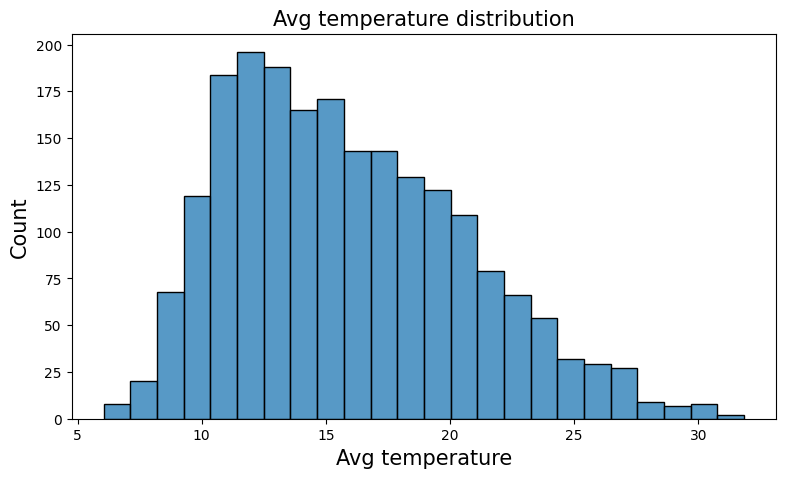

In [121]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
gl1=sns.histplot(x=(df_1['min_temperature'] + df_1['max_temperature'])/2)
gl1.set_title('Avg temperature distribution', fontsize=15)
gl1.set_xlabel('Avg temperature', fontsize=15)
gl1.set_ylabel('Count', fontsize=15)
plt.show()

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\4019536347.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df_1, x='Month', y='min_temperature', hue='Year', palette=colors, ci=None)
C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\4019536347.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g3=sns.lineplot(data=df_1, x='Month', y='max_temperature', hue='Year', palette=colors, ci=None)
C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\4019536347.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g2=sns.lineplot(data=df_1, x='Month', y='avg_temperature', hue='Year', palette=colors, ci=None)


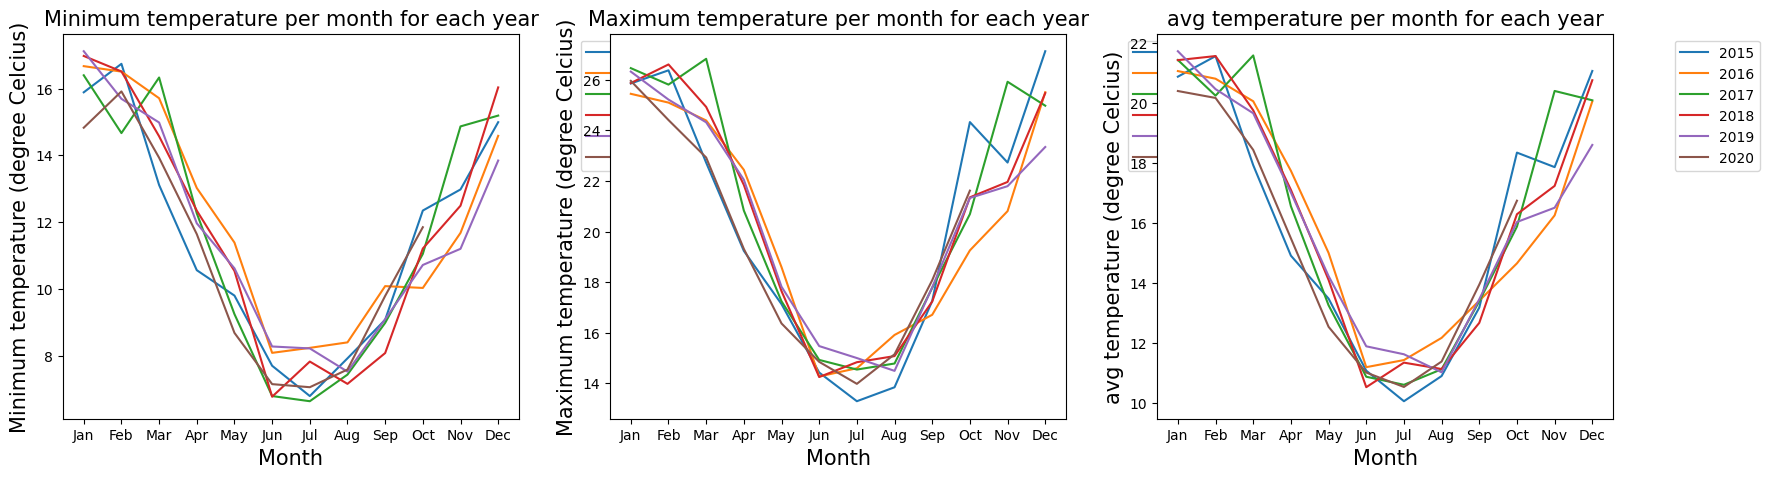

In [122]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['min_temperature'].mean().reset_index()
colors=sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='min_temperature', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Minimum temperature per month for each year', fontsize=15)
g.set_ylabel('Minimum temperature (degree Celcius)', fontsize=15)
g.set_xlabel('Month', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.legend(bbox_to_anchor= (1.12,1))



plt.subplot(1,3,2)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['max_temperature'].mean().reset_index()
colors=sns.color_palette("tab10", n_colors=6)
g3=sns.lineplot(data=df_1, x='Month', y='max_temperature', hue='Year', palette=colors, ci=None)
g3.set_xticks(range(1, 13)) 
g3.set_title('Maximum temperature per month for each year', fontsize=15)
g3.set_ylabel('Maximum temperature (degree Celcius)', fontsize=15)
g3.set_xlabel('Month', fontsize=15)
g3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g3.legend(bbox_to_anchor= (1.12,1))

plt.subplot(1,3,3)
df_1['avg_temperature'] = (df_1['min_temperature'] + df_1['max_temperature'])/2
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['avg_temperature'].mean().reset_index()
colors=sns.color_palette("tab10", n_colors=6)
g2=sns.lineplot(data=df_1, x='Month', y='avg_temperature', hue='Year', palette=colors, ci=None)
g2.set_xticks(range(1, 13)) 
g2.set_title('avg temperature per month for each year', fontsize=15)
g2.set_ylabel('avg temperature (degree Celcius)', fontsize=15)
g2.set_xlabel('Month', fontsize=15)
g2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g2.legend(bbox_to_anchor= (1.12,1))
plt.show()

In [123]:
# defining seasons
def season(month):
  season_month = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
  return season_month.get(month)

season_list = []
for month in df_1['Month']:
  seasons = season(month)
  season_list.append(seasons)
    
df_1['Season'] = season_list

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\1812217696.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g=sns.lineplot(data=df_1, x='Season', y='RRP', hue='Year',palette=colors, ci=False)


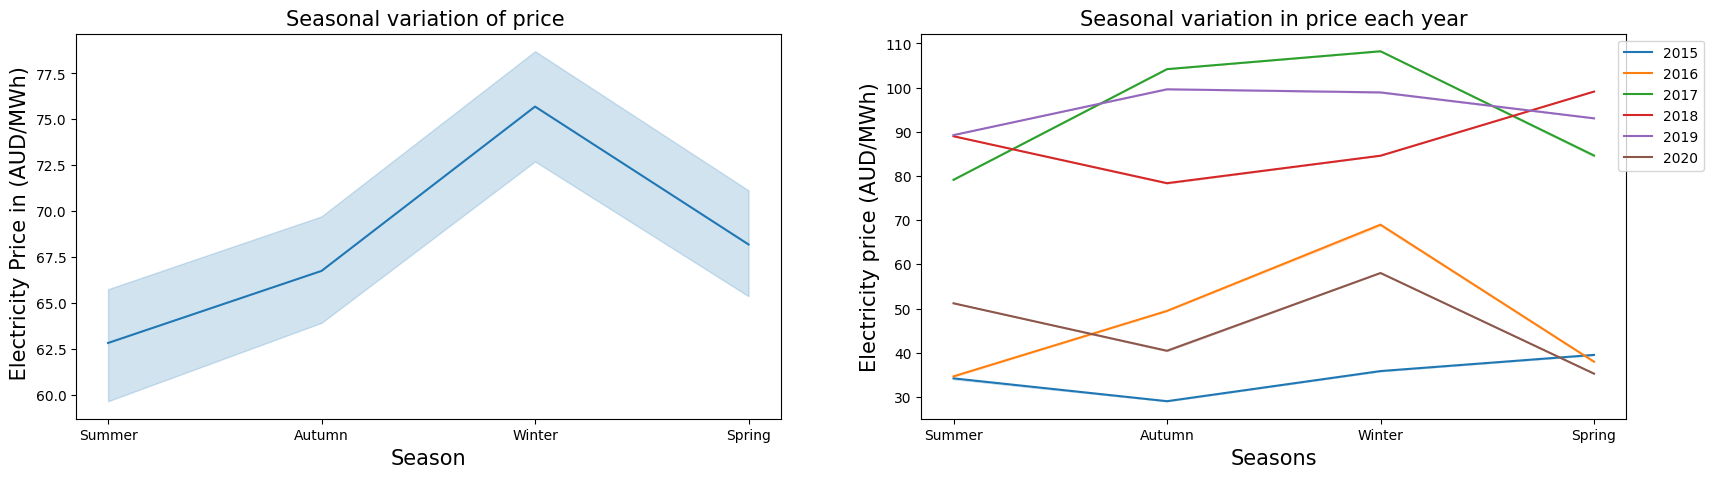

In [124]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Season', y='RRP')
g.set_ylabel(' Electricity Price in (AUD/MWh)', fontsize=15) 
g.set_title('Seasonal variation of price ', fontsize=15)
g.set_xlabel('Season', fontsize=15)




plt.subplot(1,2,2)
colors=sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Season', y='RRP', hue='Year',palette=colors, ci=False)
g.legend(bbox_to_anchor= (1.12,1))
g.set_xlabel('Seasons', fontsize=15)
g.set_ylabel('Electricity price (AUD/MWh)', fontsize=15)
g.set_title('Seasonal variation in price each year', fontsize=15)
plt.show()

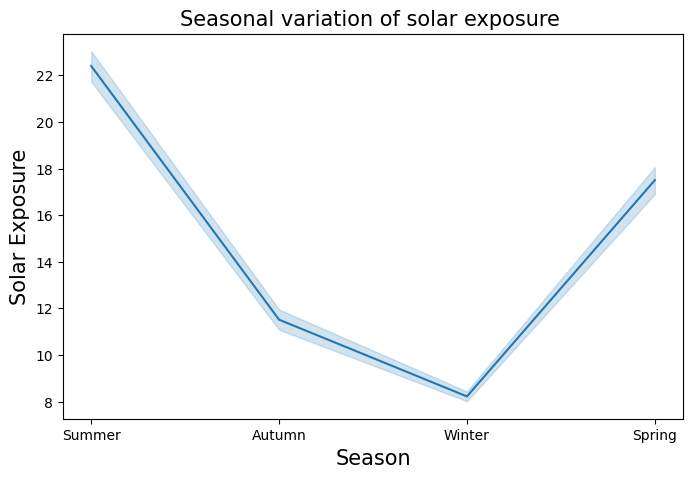

In [125]:
plt.figure(figsize=(8, 5))
g=sns.lineplot(data=df_1, x='Season', y='solar_exposure')
g.set_ylabel('Solar Exposure', fontsize=15) 
g.set_title('Seasonal variation of solar exposure ', fontsize=15)
g.set_xlabel('Season', fontsize=15)
plt.show()

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\1193528129.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g=sns.lineplot(data=df_1, x='Season', y='demand', hue='Year',palette=colors, ci=False)


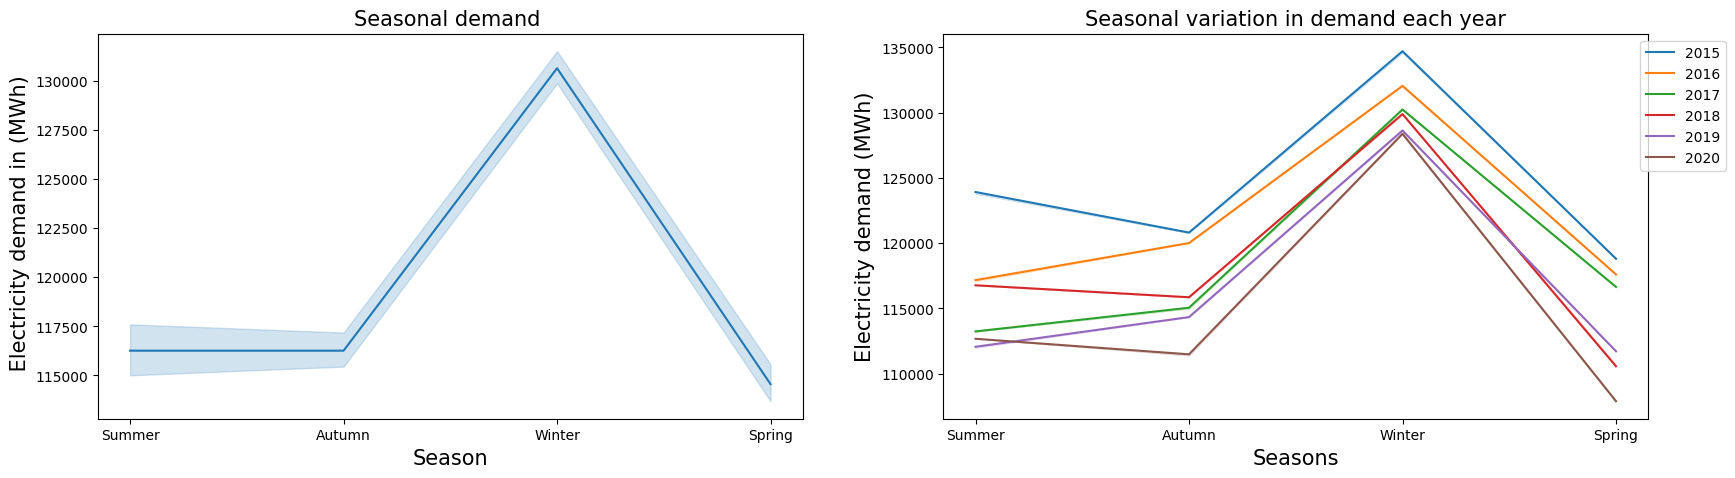

In [126]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Season', y='demand')
g.set_ylabel(' Electricity demand in (MWh)', fontsize=15) 
g.set_title('Seasonal demand ', fontsize=15)
g.set_xlabel('Season', fontsize=15)




plt.subplot(1,2,2)
colors=sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Season', y='demand', hue='Year',palette=colors, ci=False)
g.legend(bbox_to_anchor= (1.12,1))
g.set_xlabel('Seasons', fontsize=15)
g.set_ylabel('Electricity demand (MWh)', fontsize=15)
g.set_title('Seasonal variation in demand each year', fontsize=15)
plt.show()

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\587166112.py:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r = df.corr()
C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\587166112.py:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True)


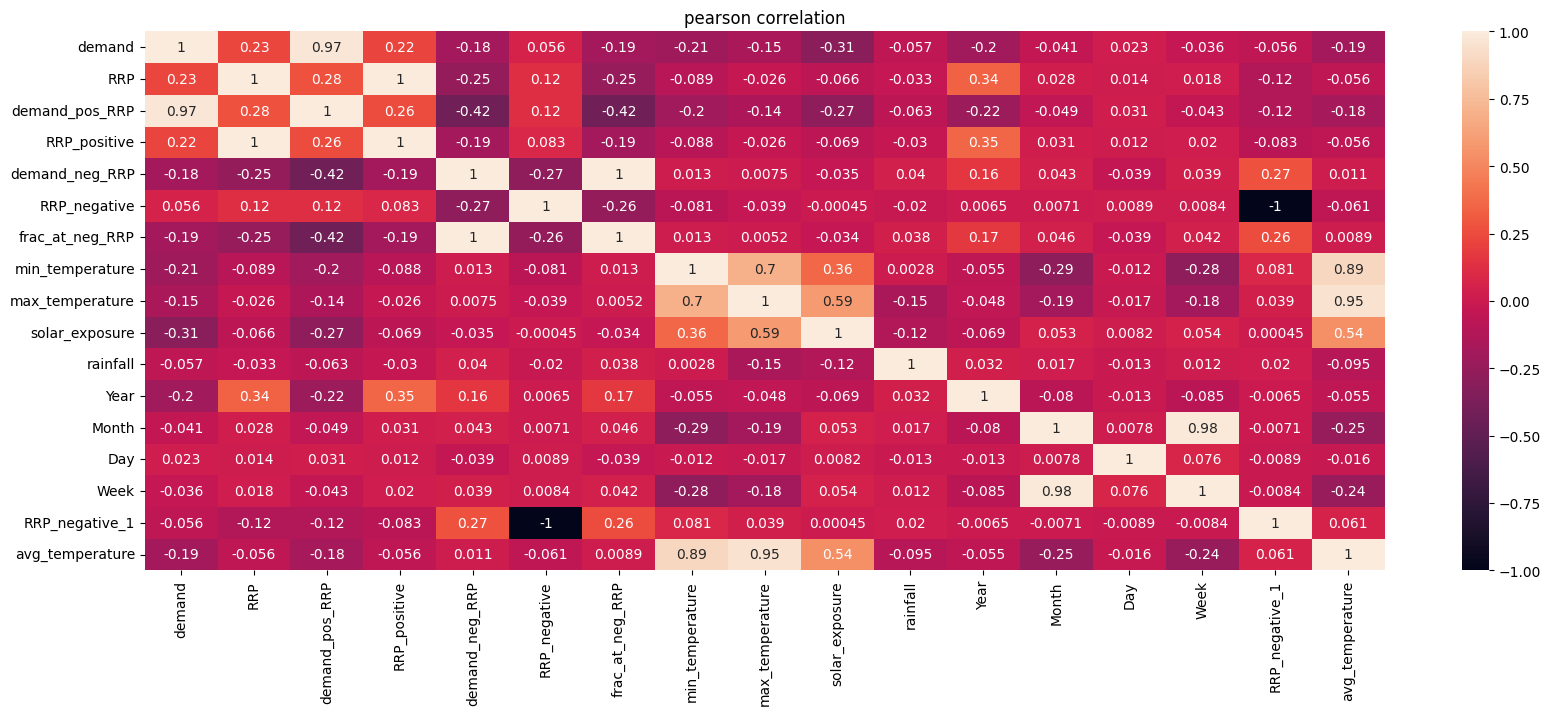

In [127]:
display = display_pearon_correlation_matrix(df_1)

In [128]:
norm_scale=MinMaxScaler()
df_scaled=norm_scale.fit_transform(df_1[['RRP','demand','demand_pos_RRP', 'demand_neg_RRP', 'min_temperature',
                                         'max_temperature', 'solar_exposure', 'rainfall']])
df_scaled=pd.DataFrame(df_scaled, columns=['RRP','demand','demand_pos_RRP', 'demand_neg_RRP', 'min_temperature',
                                           'max_temperature', 'solar_exposure', 'rainfall'])

In [129]:
df_scaled['date']=df_1['date']
df_scaled['holiday']=df_1['holiday']
df_scaled['school_day']=df_1['school_day']

In [130]:
#encoding categorical values -> holiday and school_day
df_scaled=pd.get_dummies(df_scaled)

In [131]:
df_ready=df_scaled.dropna()

In [132]:
df_ready.head()

RRP    demand  demand_pos_RRP  demand_neg_RRP  min_temperature  \
0  0.172190  0.192992        0.467128        0.040206         0.463504   
1  0.212945  0.590785        0.667744        0.147992         0.540146   
2  0.220688  0.759275        0.846879        0.000000         0.708029   
3  0.168779  0.255316        0.526322        0.000000         0.572993   
4  0.178111  0.438498        0.642840        0.000000         0.525547   

   max_temperature  solar_exposure  rainfall       date  holiday_N  holiday_Y  \
0         0.532738        0.702454  0.000000 2015-01-01          0          1   
1         0.886905        0.800613  0.000000 2015-01-02          1          0   
2         0.869048        0.791411  0.000000 2015-01-03          1          0   
3         0.369048        0.751534  0.076923 2015-01-04          1          0   
4         0.386905        0.920245  0.000000 2015-01-05          1          0   

   school_day_N  school_day_Y  
0             1             0  
1             1             0  
2             1             0  
3             1             0  
4             1             0

In [133]:
#Training dataset
df_train = df_ready[df_ready.date<='2019-01-01']
#Test dataset
df_test =  df_ready[df_ready.date>'2019-01-01']
#A reserved copy of the test dataset for plotting
df_resid = df_ready[df_ready.date>'2019-01-01']

#Extract the target feature for training and testing
y_train=df_train["RRP"]
y_test=df_test["RRP"]

#Extracting the independent features for training and testing
X_train =df_train.drop(labels=['RRP', 'date'], axis=1)
X_test=df_test.drop(labels=['RRP', 'date'], axis=1)
df_train.shape

(1451, 13)

Model training

In [134]:
reg=LinearRegression()
reg.fit(X_train, y_train)
ypred=reg.predict(X_test)

len(ypred)

599

In [135]:
df_resid['y_pred1']=ypred
df_resid=df_resid.set_index('date')

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\3089618082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resid['y_pred1']=ypred


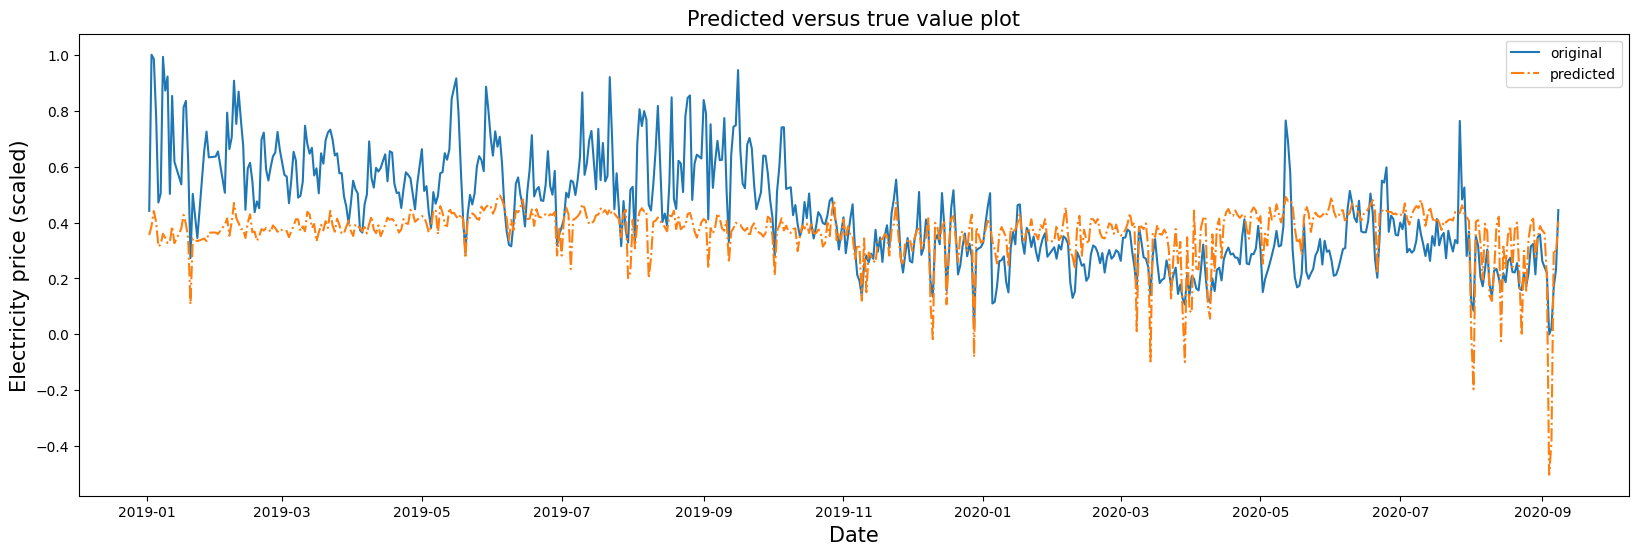

In [136]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_resid, x='date', y='RRP', label="original")
sns.lineplot(data=df_resid, x='date', y="y_pred1", linestyle= 'dashdot', label="predicted")
plt.title("Predicted versus true value plot", fontsize=15)
plt.ylabel('Electricity price (scaled)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend()
plt.show()

Testing

In [137]:
mse = mean_squared_error(y_test, ypred)
print("MSE:",  mse)
#Mean absolute error
MAE=mae(y_test, ypred)

#Root mean squared error
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("mae:", MAE)

MSE: 0.032649883109801534
RMSE: 0.1806927865461196
mae: 0.14039211200080304


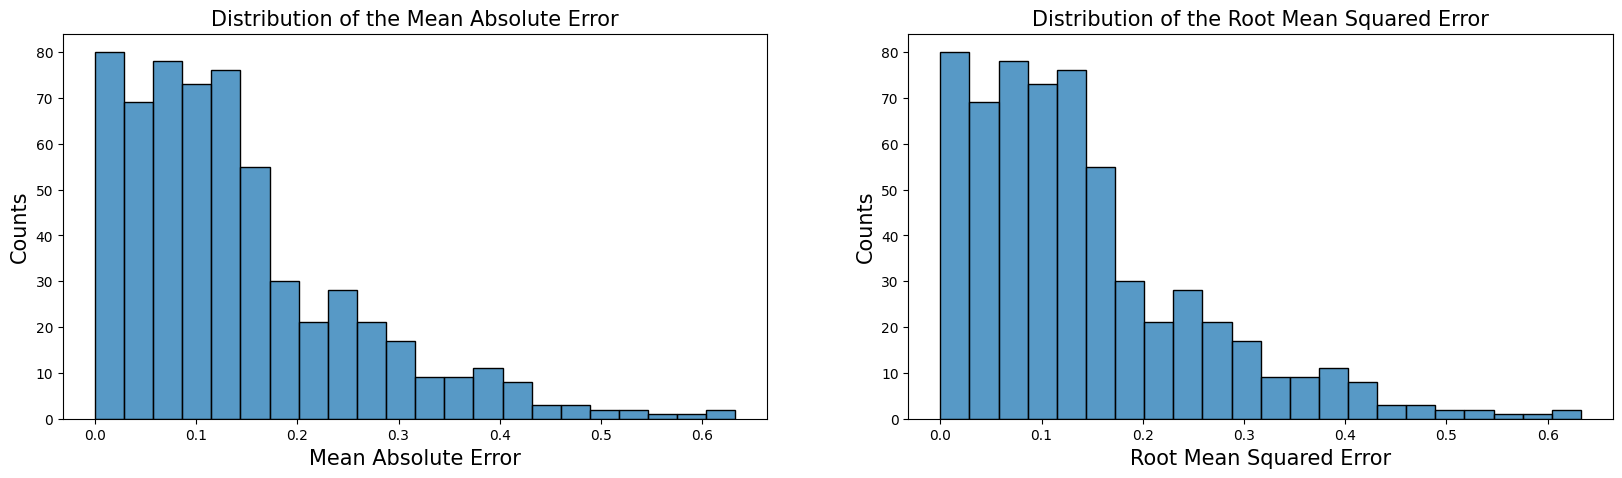

In [138]:
expected = np.array(y_test)
# predicted value
predicted = ypred
# calculate errors
MAE_errors = list()
MSE_errors=list()
for i in range(len(expected)):
# calculate error
    
    err = abs((expected[i] - predicted[i]))
    err2=(expected[i] - predicted[i])**2
# store error
    MAE_errors.append(err)
    MSE_errors.append(err2)
    
    
#Plotting error distributions
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.histplot(MAE_errors)
plt.xlabel('Mean Absolute Error', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Distribution of the Mean Absolute Error', fontsize=15)

plt.subplot(1,2,2)
sns.histplot(np.sqrt(MSE_errors))
plt.xlabel('Root Mean Squared Error', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Distribution of the Root Mean Squared Error', fontsize=15)
plt.show()

Validation

In [139]:
tscv = TimeSeriesSplit(n_splits = 5)
rmse = []
MAE=[]
MSE=[]
for train_index, test_index in tscv.split(df_ready):
    df_train, df_test = df_ready.iloc[train_index], df_ready.iloc[test_index]
    X_train =df_train.drop(labels=['RRP', 'date'], axis=1)
    X_test=df_test.drop(labels=['RRP', 'date'], axis=1)
    y_train=df_train["RRP"]
    y_test=df_test["RRP"]
    reg=LinearRegression()
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    true_values = y_test.values
    MSE.append(mean_squared_error(true_values, predictions))
    MAE.append(mae(true_values, predictions))
    rmse.append(np.sqrt(mean_squared_error(true_values, predictions)))
    
    
print("RMSE_avrg: {}".format(np.mean(rmse)))
print("MSE_avrg: {}".format(np.mean(MSE)))
print("MAE_avrg: {}".format(np.mean(MAE)))
dict_met={'Split':['1', '2', '3', '4', '5'],'RMSE':rmse, 'MAE':MAE, 'MSE':MSE}
metric=pd.DataFrame(dict_met)
metric=metric.set_index('Split')
metric

RMSE_avrg: 0.21033084709701635
MSE_avrg: 0.0479485213870593
MAE_avrg: 0.1743356044341146


RMSE       MAE       MSE
Split                              
1      0.163323  0.102774  0.026674
2      0.300003  0.267461  0.090002
3      0.206493  0.173547  0.042639
4      0.252269  0.218895  0.063639
5      0.129567  0.109001  0.016787

In [140]:
avg_weekly_demand = df_1.groupby(['Week','Month', 'Year'])['RRP'].mean().reset_index()

In [142]:
df['Week'] = df['date'].dt.week

C:\Users\ishan\AppData\Local\Temp\ipykernel_18624\3857318401.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['date'].dt.week


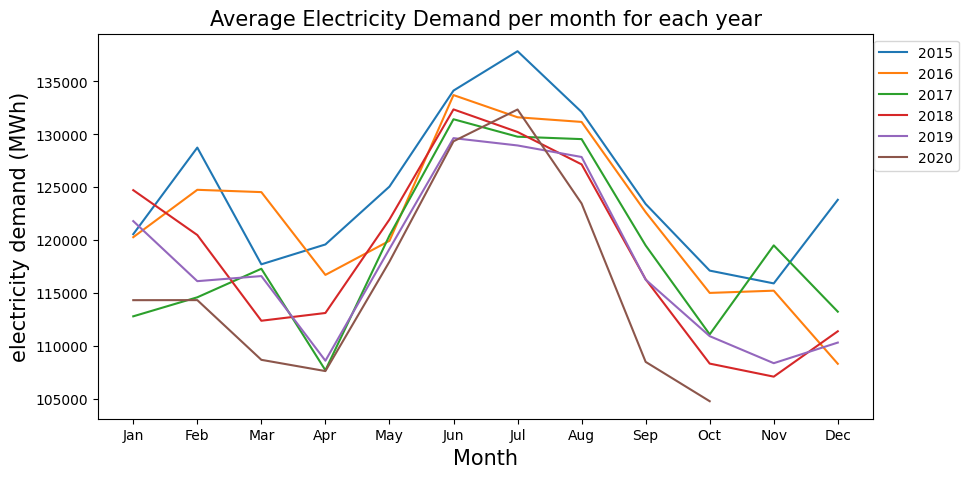

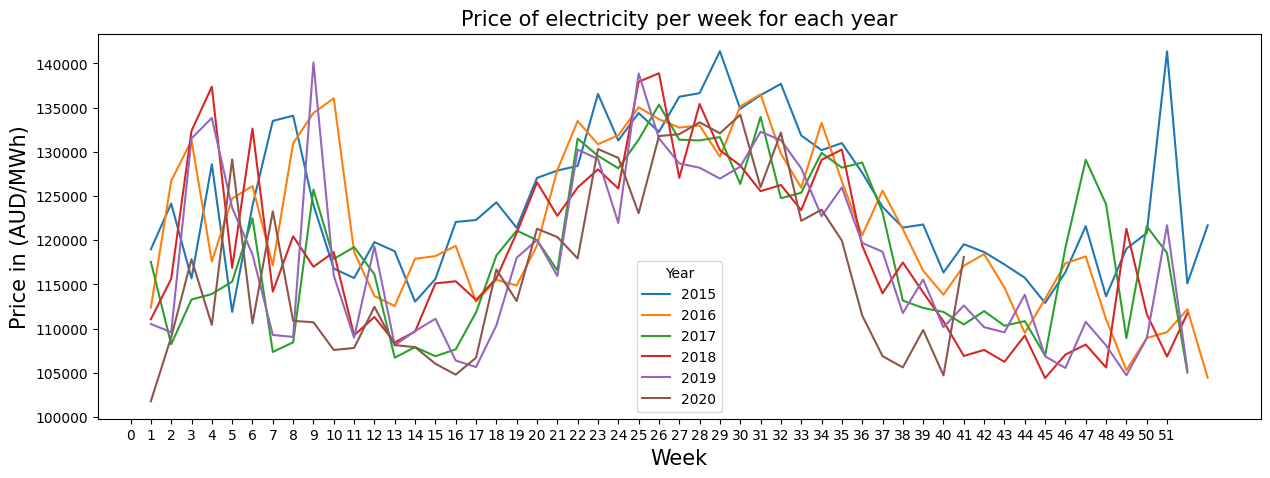

In [158]:
plt.figure(figsize=(10, 5))
Average_monthly_demand = df.groupby(['Month', 'Year'])['demand'].mean().reset_index()
colors=color = sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df, x='Month', y='demand', hue='Year', palette=colors, errorbar=None)
g.set_xticks(range(1, 13)) 
g.set_title('Average Electricity Demand per month for each year', fontsize=15)
g.set_xlabel('Month', fontsize=15)
g.set_ylabel('electricity demand (MWh)', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

plt.figure(figsize=(15, 5))
Average_weekly_demand = df.groupby(['Week', 'Year'])['demand'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
p1=sns.lineplot(data=df, x='Week', y='demand', hue='Year', palette=colors, errorbar=None)
p1.set_xticks(range(0, 52))
g.legend(bbox_to_anchor= (1.12,1))
p1.set_xlabel("Week", fontsize=15)
p1.set_ylabel("Demand in (MWh)", fontsize=15)
p1.set_title('Demand of electricity per week for each year', fontsize=15)
p1.set_xticklabels(['0','1','2','3','4','5','6', '7', '8', '9', '10','11','12','13','14','15','16', '17', '18', '19', '20','21','22','23','24','25','26', '27', '28', '29', '30','31','32','33','34','35','36', '37', '38', '39', '40','41','42','43','44','45','46', '47', '48', '49', '50', '51' ])
plt.show()
